# Optimization

## Data Science teams

- In data science, many skills are useful; however, one person cannot master them all

- Often, team members bring different strengths

- e.g., statistical modeling, programming, applied math, communication skills, etc.

- How do teams work together when core skills are different?

- Communicating with **concepts** and thinking **critically** are essential 

<div style="background-image: url(images/hbr-data-science-art-of-persuasion.png); background-repeat: no-repeat; background-size: contain; height: 600px; width: 100%; ">
</div>

## Real World Challenges in Data Science

- According to [2017 Kaggle survey](https://www.kaggle.com/surveys/2017) of data scientists, top barriers at work include ...

- Lack of clear questions to answer  
      
    **Formulating questions into mathematical equations to solve**

- Explaining data science to others  
      
    **Communicating with non-technical audience**

- Integrating findings into decisions  
      
    **Interpreting results and translating it to actions**

## Finding the "Best [something]"

- We often talk about learning the "best model", having the smallest error, etc.

- This is because we think of "best" as some _optimal solution_

- "Best (or optimal) in what sense?"

- Example: in linear regression, we minimize the square sum of the errors:  
    $$ \hat\beta = \arg\min_\beta \|y - \beta x\|_2^2 $$

- In this problem, $\hat\beta$ is the best in $\ell_2$ sense

- Here, $\ell_2$ is called _loss function_

## Objective functions give context

- Loss function (or cost function) returns a high value if the input is undesirable

- Objective function (more general) gives context: high or low depending on mathematical formulation

**Likelihood function** in parameter estimation higher the better: i.e. maximum likelihood estimator (MLE)

![likelihood](https://cdn-images-1.medium.com/max/800/1*jxZFpWtCbD4jHPV0DdDuMA.gif)

https://towardsdatascience.com/maximum-likelihood-estimation-984af2dcfcac

$$\begin{align*}\mu^\star = \arg\max_\mu \ell(x;\mu) &= \arg\max_\mu \log \mathcal{L}(x;\mu)
= \arg\max_\mu\log\left( \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}} \right)
\end{align*}$$

In regression, coefficients that give minimum of, say, **sum of squared errors (SSE)** is best (there are others)

![residual](https://www.researchgate.net/profile/Bernd_Skiera/publication/327624256/figure/fig1/AS:670372009635846@1536840550374/Regression-line-with-residuals-and-squared-residuals.ppm)

https://www.researchgate.net/profile/Bernd_Skiera/publication/327624256

In physics, a stable equilibrium state of a particle is where **Potential energy** is lowest

![potential energy](https://phys.libretexts.org/@api/deki/files/3051/stable-unstable-graph.png)

https://phys.libretexts.org

In operations research, best matching between jobs and workers maximizes flow through a network

![matching](https://uploads.toptal.io/blog/image/124062/toptal-blog-image-1503922967927-76f1d422af49bb49275afdbcdf9fa5fa.gif)

https://uploads.toptal.io/

## Characterizing the "best solution": objective function

- For humans, what is considered "best" depends on the individual

- In machine learning, what is the "best" (e.g. solution, model, etc.) depends on the formulation: i.e., **objective function**

- This is easier said than done

- After that, the challenge is to find the optimal solution to the objective function

- There are general optimization softwares exist: e.g., `cvxpy`

## `CVXPY`

- `CVXPY` is an optimization package

- Optimization problems can be specified with declarative syntax

- [CVXPY Homepage](https://www.cvxpy.org/index.html)

- Name CVX is from convex (as in convex functions)

- Solving convex functions have been studied extensively

## Example: Linear regression from scratch

- In linear regression problem, we have

- Measurements $X \in \mathcal{R}^{m \times n}$ and $b \in \mathcal{R}^m$

- Seek a vector $\beta \in \mathcal{R}^{n}$ such that $X\beta$ is close to $b$

- Closeness is defined as the sum of the squared differences (objective function):
$$ \sum_{i=1}^m (y_i - x_i^T\beta)^2 = \|y - X\beta\|_2^2, $$

- Optimal $\beta$ solves following optimization problem
$$  
    \begin{array}{ll}
    \beta^\star = \arg\min_\beta\mbox{minimize}   & \|y - X\beta\|_2^2.
    \end{array}
$$

- Let $\beta^\star$ denote the optimal $\beta$

- We can compute $\beta^\star$ with an optimization package, `cvxpy`

In [1]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate data.
m = 10 
n = 5 
np.random.seed(1)

true_beta = np.array([0]*n)
true_beta[0:2] = 4

X = np.random.randn(m, n)
y = X@true_beta

# Define and solve the CVXPY problem.
beta = cp.Variable(n)
cost = cp.sum_squares(X*beta - y)
prob = cp.Problem(cp.Minimize(cost))
prob.solve() # The optimal objective value is returned by `prob.solve()`.

2.1962944797293364e-30

In [2]:
# Print result.
print("\nThe optimal objective value is", prob.value)

print("\nThe true beta is", true_beta)
print("The optimal (rounded) beta is", np.round(beta.value, 10))

print("\nThe norm of the residual is ", cp.norm(X*beta - y, p=2).value)
print("The (rounded) gradient at the solution is ", np.round((X.T@X)@beta.value - X.T@y, 5))


The optimal objective value is 2.1962944797293364e-30

The true beta is [4 4 0 0 0]
The optimal (rounded) beta is [ 4.  4. -0.  0.  0.]

The norm of the residual is  3.39220374266123e-15
The (rounded) gradient at the solution is  [ 0.  0.  0.  0. -0.]


## Specifying optimization functions

Optimization functions, in general, look like the following:

$$  
    \begin{array}{lll}
    \theta^\star =& \arg\min_\theta & f(\theta) \\
    & \text{subject to } & \theta \in \mathcal{C} & \\
    \end{array}
$$

- **Variable of interest** (assume is scalar valued): $\theta$ 

- **Objective function**: $f(\theta)$  
    e.g., $f(\theta) = \| X\theta - y \|_2$

- **Constraint set**: $\mathcal{C}$  
    e.g., $\theta \geq 0$ implies $\mathcal{C} = \{\theta\,:\,\theta\geq 0\}$

## Non-negative Matrix Factorization from scratch

- Given a matrix $A \in \mathbf{\mbox{R}}^{m \times n}$

- Solve the following problem:
    \begin{array}{ll}
    \mbox{minimize}   & \| A - YX \|_F \\
    \mbox{subject to} & Y \succeq 0 \\
                      & X \succeq 0,
    \end{array}
    where $Y \in \mathbf{\mbox{R}}^{m \times k}$ and $X \in \mathbf{\mbox{R}}^{k \times n}$.

- An *approximate* solution is computed by first generating a random initial guess for $Y$

- Then alternatively minimizing over $X$ and $Y$ for a fixed number of iterations.

- Example is from https://www.cvxpy.org/examples/index.html

In [3]:
# Ensure repeatably random problem data.
np.random.seed(1)

# Generate random data matrix A.
m = 10
n = 10
k = 5
A = np.random.rand(m, k).dot(np.random.rand(k, n))
A

array([[0.36578562, 0.90925931, 0.88152457, 0.59954003, 0.38252948,
        0.71393227, 0.97967548, 0.80800948, 1.1272552 , 0.99293615],
       [0.74532355, 0.94636428, 0.73737872, 0.83074556, 0.51912656,
        0.64505613, 1.15377095, 0.92155154, 0.75458583, 1.00393961],
       [1.04173172, 1.17005205, 1.26474289, 0.8824068 , 0.56980605,
        1.2165679 , 1.28579893, 1.34837596, 1.63045178, 1.40650971],
       [0.70714701, 0.98038111, 0.70402935, 0.96552132, 0.69135451,
        0.52451783, 1.41918074, 0.75663339, 1.30247237, 1.32908046],
       [1.10983739, 2.25148073, 1.79966617, 1.61516947, 1.11119794,
        1.44141383, 2.48124124, 1.89578475, 2.08365176, 2.32708485],
       [0.31208649, 1.58757829, 0.77643788, 0.87147791, 0.8637883 ,
        0.46006345, 1.47228383, 0.85626615, 0.75204488, 1.35176932],
       [1.46069598, 1.3622593 , 1.15830186, 1.5601164 , 0.87660762,
        1.03095813, 2.07771337, 1.47571022, 1.53063733, 1.76970271],
       [0.93259587, 1.33683282, 1.0109544

In [4]:
# Initialize Y randomly.
Y_init = np.random.rand(m, k)

# Ensure same initial random Y, rather than generate new one
# when executing this cell.
Y = Y_init 

# Perform alternating minimization.
MAX_ITERS = 30
residual = np.zeros(MAX_ITERS)
for iter_num in range(1, 1+MAX_ITERS):
    # At the beginning of an iteration, X and Y are NumPy
    # array types, NOT CVXPY variables.

    # For odd iterations, treat Y constant, optimize over X.
    if iter_num % 2 == 1:
        X = cp.Variable(shape=(k, n))
        constraint = [X >= 0]
    # For even iterations, treat X constant, optimize over Y.
    else:
        Y = cp.Variable(shape=(m, k))
        constraint = [Y >= 0]
    
    # Solve the problem.
    # increase max iters otherwise, a few iterations are "OPTIMAL_INACCURATE"
    # (eg a few of the entries in X or Y are negative beyond standard tolerances)
    obj = cp.Minimize(cp.norm(A - Y*X, 'fro'))
    prob = cp.Problem(obj, constraint)
    prob.solve(solver=cp.SCS, max_iters=10000)

    if prob.status != cp.OPTIMAL:
        raise Exception("Solver did not converge!")
    
    print('Iteration {}, residual norm {}'.format(iter_num, prob.value))
    residual[iter_num-1] = prob.value

    # Convert variable to NumPy array constant for next iteration.
    if iter_num % 2 == 1:
        X = X.value
    else:
        Y = Y.value

Iteration 1, residual norm 6.162631300288564
Iteration 2, residual norm 1.0417212280147534
Iteration 3, residual norm 0.9305289669015021
Iteration 4, residual norm 0.5452281149039587
Iteration 5, residual norm 0.31354074747926347
Iteration 6, residual norm 0.23735094021095743
Iteration 7, residual norm 0.19293901748930656
Iteration 8, residual norm 0.16133068119270774
Iteration 9, residual norm 0.1333246313286077
Iteration 10, residual norm 0.11149863448559755
Iteration 11, residual norm 0.0928670609578753
Iteration 12, residual norm 0.07781148174607003
Iteration 13, residual norm 0.06524525350749973
Iteration 14, residual norm 0.054956400533560656
Iteration 15, residual norm 0.04638637015028044
Iteration 16, residual norm 0.03941905900017404
Iteration 17, residual norm 0.03381960529948837
Iteration 18, residual norm 0.029234363998676134
Iteration 19, residual norm 0.02575998542488671
Iteration 20, residual norm 0.022706734352687476
Iteration 21, residual norm 0.02021499857945061
Itera

In [5]:
print(A - Y.dot(X))
print('Residual after {} iterations: {}'.format(iter_num, prob.value))

[[-4.49617672e-03 -8.33727593e-04  1.12570552e-03  6.44704254e-04
  -1.91443468e-03 -8.80562021e-04  3.16047421e-03 -1.42320351e-03
   9.43224985e-04 -5.74654557e-04]
 [ 1.64273965e-04  9.41993479e-05 -1.87006425e-04  2.99273157e-04
   8.96399277e-05  1.35080224e-04 -4.68990520e-04  1.09277683e-04
  -4.25494928e-05  1.41383215e-04]
 [-4.20958969e-04  9.24809567e-04  4.09863370e-04 -3.26450040e-04
  -5.44083871e-05  8.06078234e-04 -1.33662919e-03  6.83286218e-04
  -5.14147294e-04 -6.16213840e-05]
 [ 5.77677671e-05  8.86585955e-05  9.49074549e-05  2.42656599e-04
  -9.02646860e-05 -4.00156132e-04 -3.65963354e-04  2.60787294e-04
   6.88803388e-05  7.60765172e-05]
 [ 2.90344525e-04 -5.09501484e-05 -4.65387113e-05 -4.99774490e-04
   2.11622004e-04  3.35279964e-04  3.54681420e-04 -1.53569246e-04
  -1.13430635e-04 -1.03910198e-04]
 [-9.60741880e-05  1.89008570e-05 -7.45413090e-05  2.11200830e-04
  -2.30559880e-05  7.13142839e-05 -1.39065341e-04 -5.31385084e-06
   1.01581413e-05  6.17903058e-05

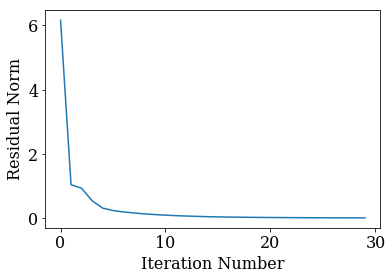

In [6]:
import matplotlib.pyplot as plt

# Show plot inline in ipython.
%matplotlib inline

# Set plot properties.
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Create the plot.
plt.plot(residual)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()